<a href="https://colab.research.google.com/github/mohani98/EDAairbnb/blob/main/Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **AirBnb Bookings Analysis**

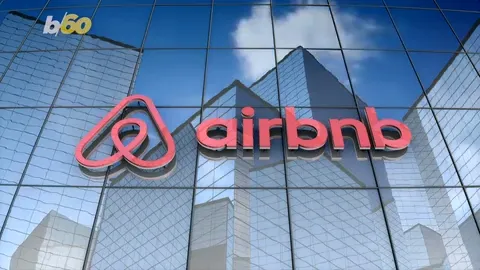


##### **Project Type**    - ***EDA***
##### **Contribution**    -
***Team Member 1***:- Bijoy kumar gupta

***Team Member 2***:- Mohani bhardwaj


# **Project Summary -**

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 100,000 cities and 220 countries worldwide. For hosts, it's a way to earn money while protecting their property from potential damage. However, for guests, it's a risky venture that they should avoid.

For this project we are analyzing Airbnb’s New York City(NYC) data. NYC is not only the most famous city in the world but also top global destination for visitors drawn to its museums, entertainment, restaurants and commerce. According to the Office of New York State Comptroller, NYC hosted 66.6 million visitors in 2019.

Data analysis on thousands of listings provided through Airbnb is a crucial factor for the company. Our main objective is to find out the key metrics that influence the listing of properties on the platform. For this, we will explore and visualize the dataset from Airbnb in NYC using basic exploratory data analysis (EDA) techniques. We have found out the distribution of every Airbnb listing based on their location, including their price range, room type, listing name, and other related factors. We have analyzed this dataset from different angles and have come up with interesting insights. This can help in making strategic data-driven decisions by the marketing team, finance team and technical team of Airbnb.


# **GitHub Link -**

https://github.com/Bijoy-910

# **Problem Statement**


**This project aims to analyze Airbnb data using Python language and it's libraries, to perform data cleaning and preparation, develop interactive  visualizations, and create dynamic plots to gain insights into pricing variations, availability patterns, and location-based trends.**

# **Define Your Business Objective?**

* The goal of the project - The purpose of the project is to gather information and analyze the detailed information of the different bookings in the neighborhood groups in order to provide insights about the bookings in a particular area as per your preference, type of rooms, and price accordingly.
* We have tried discovering relationships among different columns and found meaningful insights to decipher business impacts.


***Data Cleaning***:

1.Dropping duplicates.

2.Cleaning individual columns.

3.Remove the Null values from the dataset

***Data Analysis and Visualization***:

*   What is the average price  according to the location?
*   Number of active hosts per location (Where most of the hosts focused to own property?)
*   Which properties are the busiest in terms of Number of Bookings ?
*   Find the total count of each room type
*   Room types and their relation with availability in different neighbourhood groups.
*   Which are the top 25 most used words in listing names?
*   Find top 10 hosts with most listings.
*   Find the top three hosts based on their turnover.
*   Find total no. of nights spend per location.
*   Total no. of nights spends per room types.
*   Which host has received the most number of reviews?
*   Density of property within a neighbourhood group with location.
*   Correlation of different numerical attributes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#import all library that will be used in entire project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns
import missingno as msno

### Dataset Loading

In [ ]:
#Mount google drive for access the dataset of Airbnb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#File path of Airbnb dataset in google drive
file_path = "/content/drive/MyDrive/Airbnb NYC 2019.csv"
airbnb_df = pd.read_csv(file_path)

### Dataset First View

In [ ]:
#Dataset First Look
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
row , column = airbnb_df.shape
print("No of rows:",row)
print("No of columns:",column)

No of rows: 48895
No of columns: 16


Dataset Information

In [ ]:
#Information about the columns how many are their and their data types
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Duplicate Values

In [ ]:
#Dataset Duplicate Value Count
#After seeing the output we can tell there is no duplicate rows are present
airbnb_df[airbnb_df.duplicated()].sum()

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

Missing values/Null values

In [ ]:
# Missing Values/Null Values Count
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

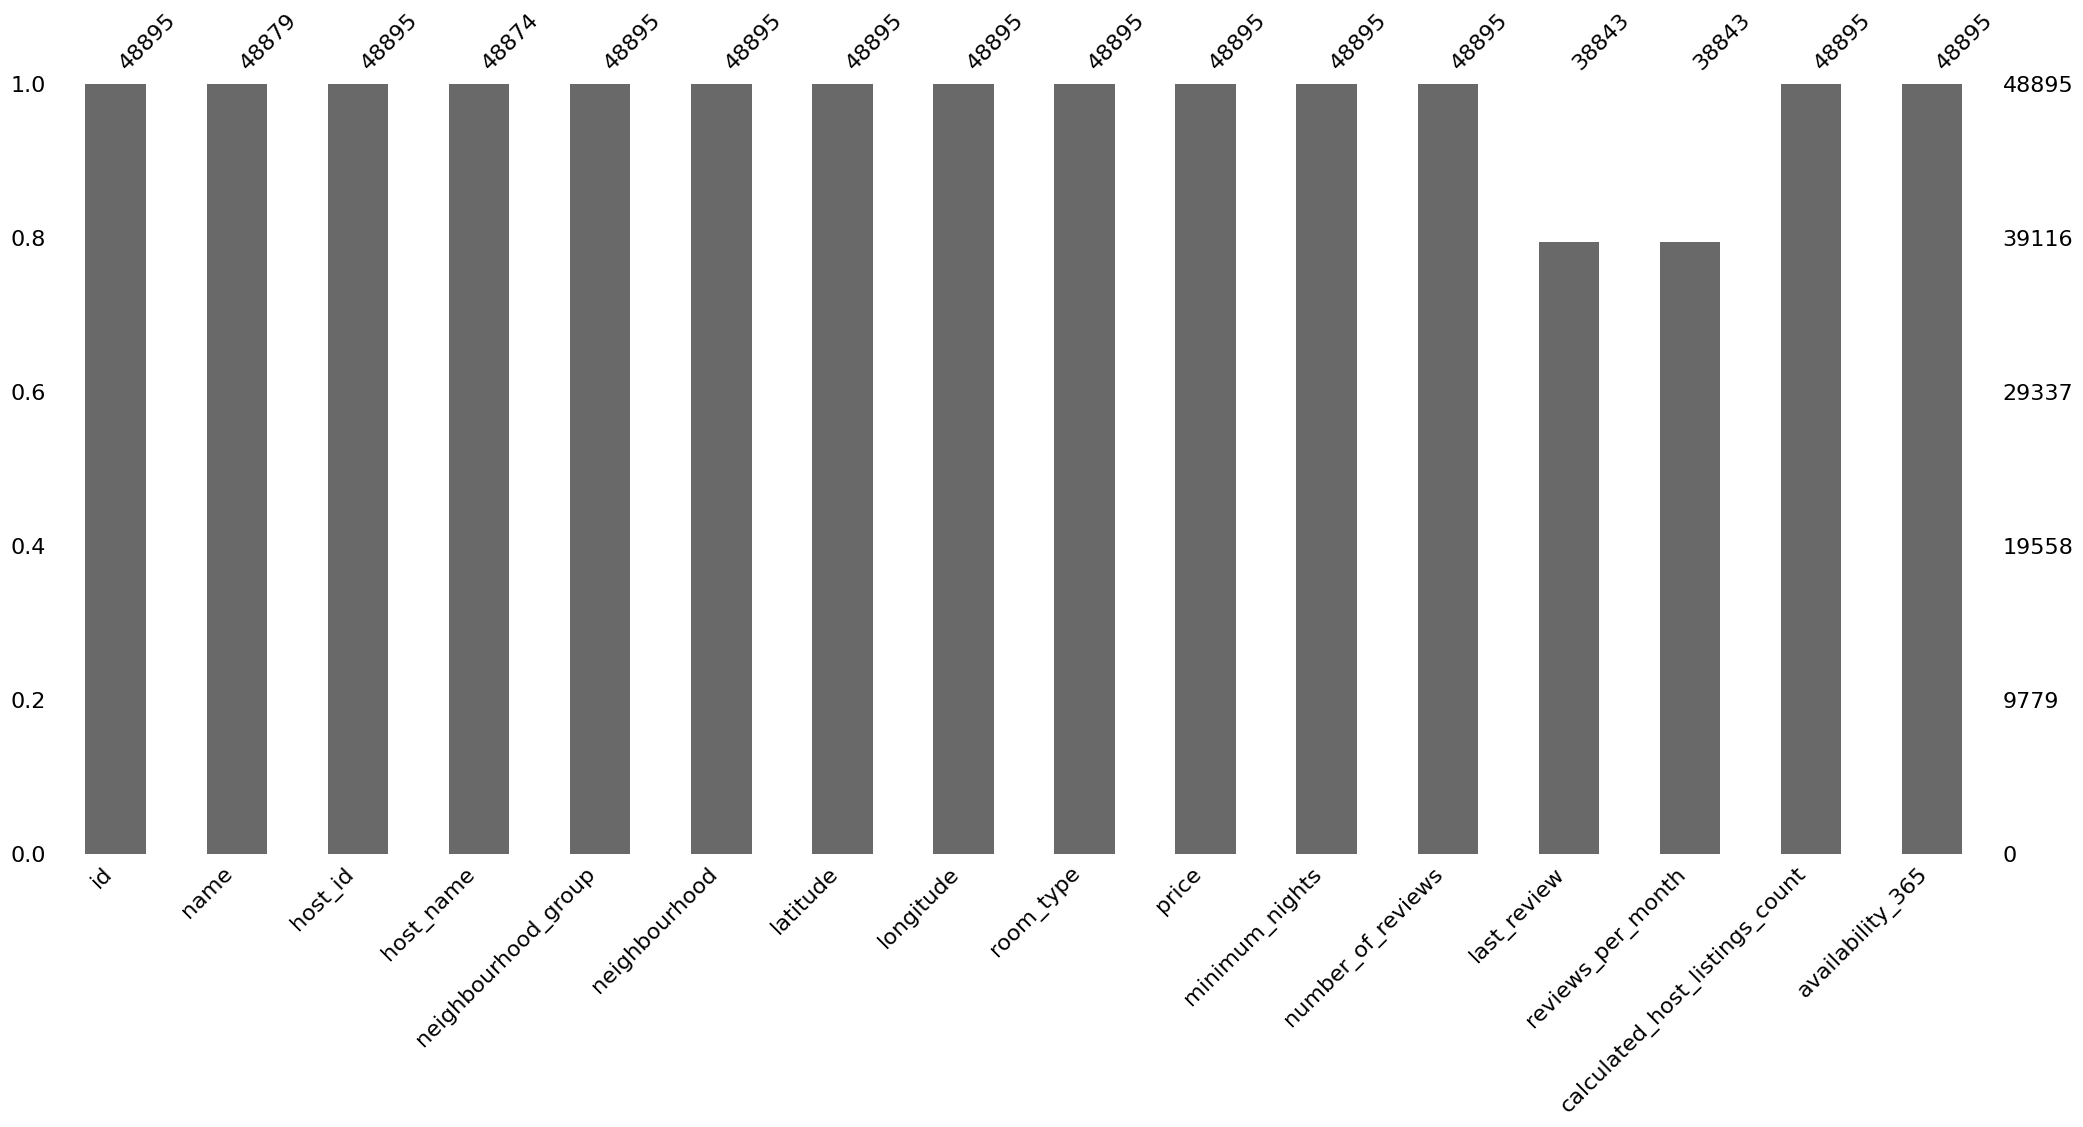

In [ ]:
# Visualizing the missing values
msno.bar(airbnb_df)

### What did you know about your dataset?

As per the above information, we can see the columns name, host_name, neighbourhood_group, neighborhood and room_type are all object types. Others are either int or float type.

The following are the counts for null values we have got:
* name - 16
* host_name - 21
* last_review - 10052
* reviews_per_month - 10052


## ***2. Understanding Your Variables***

In [ ]:
#Dataset Columns
print(airbnb_df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [ ]:
#Dataset Describe
airbnb_df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


### Variables Description

### The following columns are listed in the DataFrame

* ID(int64) - ID of the person who booked the Airbnb.
* Name(object) - Name or title.
* host_id(int64) - ID of the person who rents out the property.
* Host_name(object) - Name of the person who rents out their property.
* neighbourhood_group(object)- It indicates the region that includes several small neighborhoods (i.e. like a broader group having smaller units of neighborhood).
* Neighborhood(object) - It indicates the geographically smaller areas within a city or region having their own local identity and characteristics.
* Latitude(float64) - Shows the measurement of the distance from the north or south pole of an equator of that particular property.
* Longitude(float64) - Shows the measurement of distance from the east or west prime meridian of that particular property.
* room_type(object) - Indicates the type of the room i.e. private room, Entire home/apt, or shared room.
* price(int64) - This indicates the value at which the property is rented in bucks.
* minimum_nights(int64) - This shows the minimum nights.
* number_of_reviews(int64) - This indicates the number of reviews received by a particular property.
* last_review(object) - Shows the last date of the review given
* reviews_per_month(float64) - It indicates the number of reviews given in a particular month.
* calculated_host_listings_count(int64)- It shows the count of listings per host.
* availability_365(int64) - It indicates for how many days the Airbnb is available in a year.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_values = {}
for column in airbnb_df.columns:
    unique_values[column] = airbnb_df[column].unique()

# Print unique values for each variable
for column, values in unique_values.items():
    print(f"Unique values for {column}:\n{values}\n")

Unique values for id:
[    2539     2595     3647 ... 36485431 36485609 36487245]

Unique values for name:
['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]

Unique values for host_id:
[     2787      2845      4632 ... 274321313  23492952  68119814]

Unique values for host_name:
['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']

Unique values for neighbourhood_group:
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']

Unique values for neighbourhood:
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' '

In [ ]:
# Check Unique Values count for each variable.
d={}
for i in airbnb_df.columns:
  u=airbnb_df[i].unique()
  d[i]=len(u)
df = pd.DataFrame([d])
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,48895,47906,37457,11453,5,221,19048,14718,3,674,109,394,1765,938,47,366


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Write your code to make your dataset analysis ready.
#droping the unwanted and null values
airbnb_df.drop(['last_review','reviews_per_month'],axis=1,inplace=True)
airbnb_df.dropna(inplace=True)
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


In [ ]:
#again checking for null values
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# Dataset Info and check how many entries are there left after cleaning the data
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  calculated_host_listings_count  

In [ ]:
#Counting the number of rows and column after cleaning the data set
row, columns = airbnb_df.shape
print(f"No of rows: {row}")
print(f"No of columns: {columns}")

No of rows: 48858
No of columns: 14


In [ ]:
#again checkin for unique values in each column
uniq={}
for i in airbnb_df.columns:
  u=airbnb_df[i].unique()
  uniq[i]=len(u)
df = pd.DataFrame([uniq])
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,48858,47884,37425,11450,5,221,19039,14716,3,674,108,394,47,366


In [ ]:
#the view after cleaning
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [ ]:
def outliers(col):
  sns.boxplot(airbnb_df[col],color='#A059BF')
  plt.ylabel(col)
  return plt.show()

enter column name:
minimum_nights


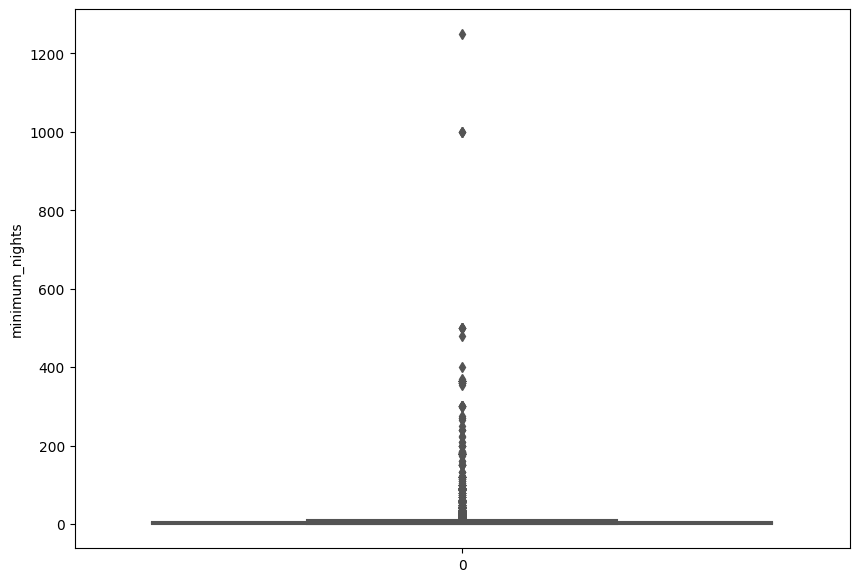

In [ ]:
x=input("enter column name:\n")
outliers(x)

In [ ]:
#removing outliers
airbnb_df.drop(airbnb_df[airbnb_df['minimum_nights']>=600].index,inplace=True,axis=0)

In [ ]:
#handling outliers having 0 price
x=airbnb_df['price'].mode()
airbnb_df['price'].replace(0,x[0],inplace=True)

In [ ]:
#imputing values for outliers
x=airbnb_df['availability_365'].mean()
airbnb_df['availability_365'].replace(0,round(x),inplace=True)

### What all manipulations have you done and insights you found?

* The columns last_review and reviews_per_month had large number of null values which contributed a lot to the data and from analysis point of view these columns are of no significance so we dropped these columns.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 8

Find the top three hosts based on their turnover.

In [ ]:
#Find the maximum price across different host name
top_host=airbnb_df.groupby(['host_name','host_id'])['price'].sum().reset_index()
top_host.rename(columns={'price':'total_price'},inplace=True)
top_host.head()

,host_name,host_id,total_price
0,'Cil,45354224,120
1,(Ari) HENRY LEE,40605120,140
2,(Email hidden by Airbnb),5610823,261
3,(Email hidden by Airbnb),7580102,389
4,(Email hidden by Airbnb),11495251,200


In [ ]:
# find top three host best on their turnover
top_3=top_host.sort_values('total_price',ascending=False).iloc[:3,:3]
top_3

,host_name,host_id,total_price
33206,Sonder (NYC),219517861,82795
4856,Blueground,107434423,70331
31213,Sally,156158778,37097


Text(0, 0.5, 'Total price')

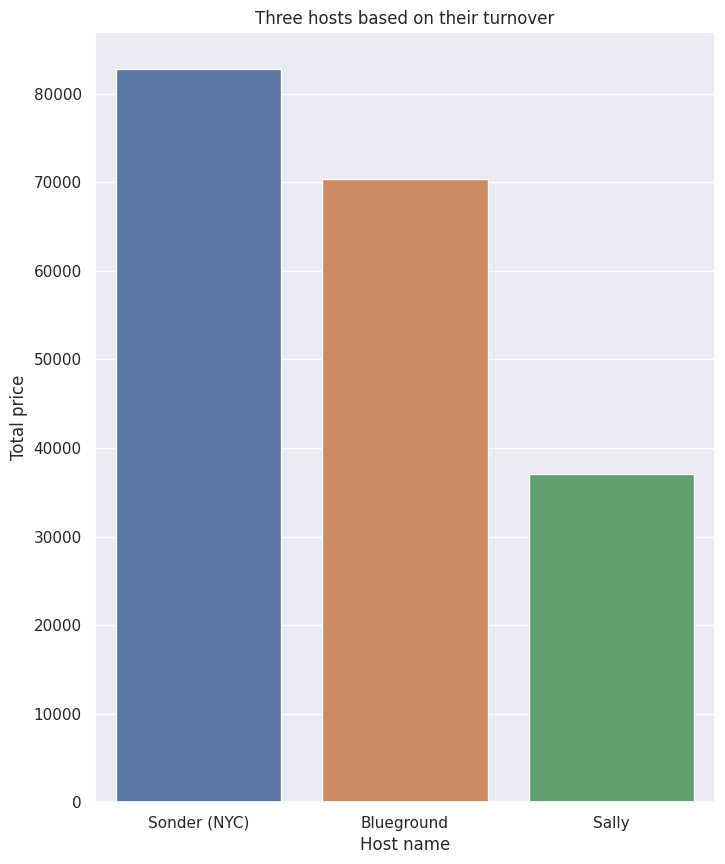

In [ ]:
#Creating a bar chart plot
sns.set(rc={'figure.figsize':(8,10)})
top_3_host_chart = sns.barplot(x='host_name',y='total_price',data = top_3)
top_3_host_chart.set_title('Three hosts based on their turnover')
top_3_host_chart.set_xlabel('Host name')
top_3_host_chart.set_ylabel('Total price')

##### 1. Why did you pick the specific chart?

Bar chart clearly visualize the total turnover of the top three hosts based on the sum of prices for their listings.

##### 2. What is/are the insight(s) found from the chart?

From the chart we are able to understand that sonder has the highest turnover in the top three.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding which hosts contribute the most to total turnover can inform business strategies.Featuring top hosts in marketing materials can attract both hosts and guests.


Other hosts may feel neglected if not featured, potentially impacting relationships.Focusing solely on turnover may overlook other aspects of host performance.

#### Chart - 9

Find total no. of nights spend per location

In [ ]:
#Find the maximum(minimum nights) spending by customer across different neighourhood group
total_nights=airbnb_df.groupby('neighbourhood_group')['minimum_nights'].mean().reset_index()
final_nights=total_nights.sort_values('minimum_nights',ascending=False)
final_nights.head()

,neighbourhood_group,minimum_nights
2,Manhattan,8.389279
1,Brooklyn,6.008264
3,Queens,5.182910
4,Staten Island,4.831099
0,Bronx,4.564738


Text(0.5, 0, 'Neighbourhood group')

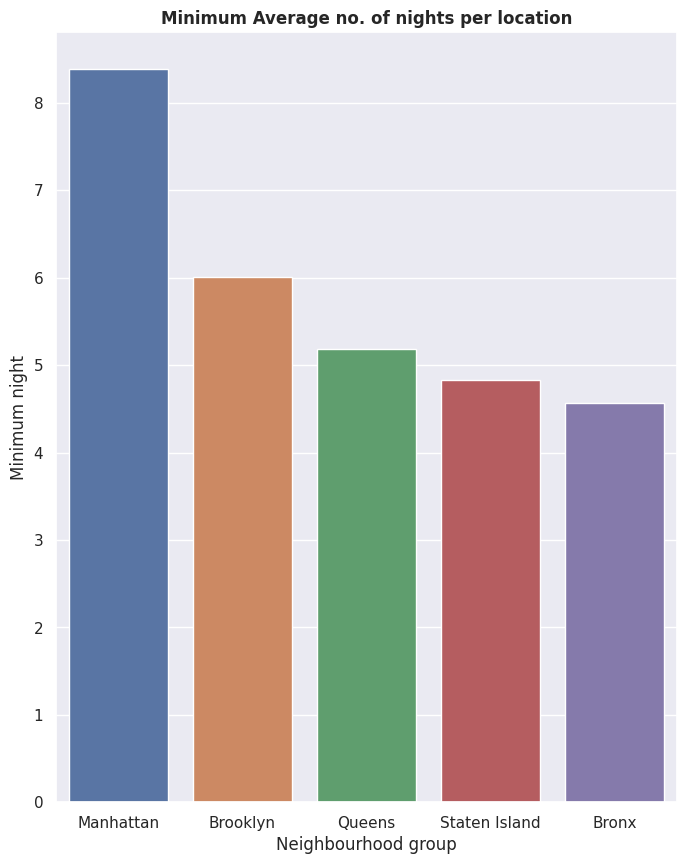

In [ ]:
#Creating a chart of total no. nights spend per location
Night_per_location = sns.barplot(x='neighbourhood_group',y='minimum_nights',data = final_nights)
Night_per_location.set_title('Minimum Average no. of nights per location', weight='bold')
Night_per_location.set_ylabel('Minimum night')
Night_per_location.set_xlabel('Neighbourhood group')

##### 1. Why did you pick the specific chart?

The chart allows for a comparison of the average minimum nights spent in different neighborhood groups.

##### 2. What is/are the insight(s) found from the chart?

Provides insights into customer behavior related to minimum nights, aiding in strategic decision-making.Helps identify areas with high demand for longer stays, informing marketing strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding average minimum nights  contributes to optimizing the balance of supply and demand.

#### Chart - 10

Total no. of nights spend per room types

In [ ]:
#Finding the maximum(minimum nights) time spend by customer across different room type
total_room=airbnb_df.groupby('room_type')['minimum_nights'].mean().reset_index()
room_types=total_room.sort_values('minimum_nights',ascending=True)
room_types

,room_type,minimum_nights
1,Private room,5.336203
2,Shared room,5.622625
0,Entire home/apt,8.382183


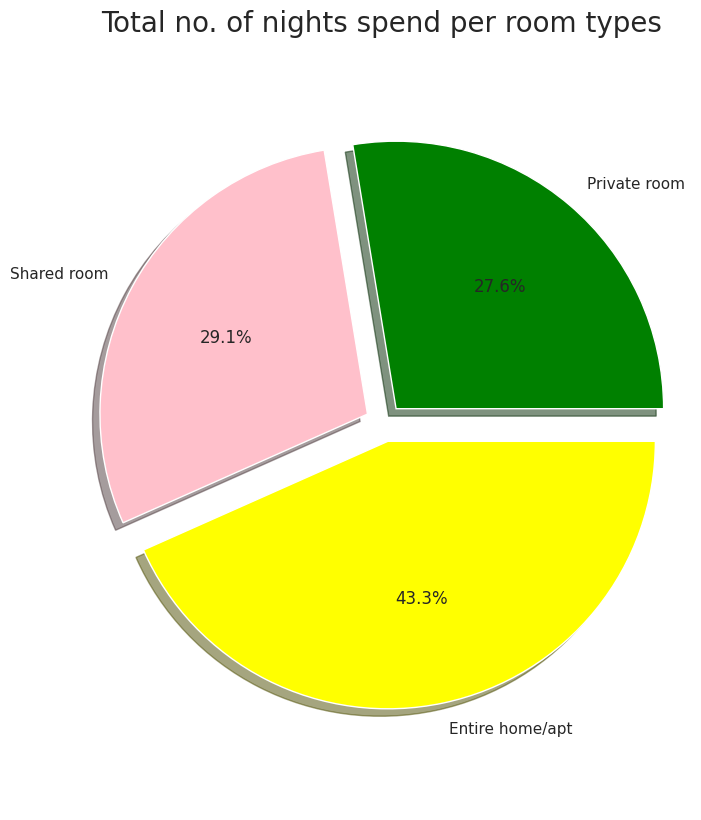

In [ ]:
#Creating dataset
labels=list(room_types['room_type'])
sizes=list(room_types['minimum_nights'])
# create color parameter
colors=['green','pink','yellow']
# create explode
explode = (0.07, 0.07, 0.07)
#creating pie chart
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('Total no. of nights spend per room types', fontsize=20)
plt.axis("equal")
plt.show()

##### 1. Why did you pick the specific chart?

Provides a visual representation of the proportion of average minimum nights of each room type.

##### 2. What is/are the insight(s) found from the chart?

The entire home appartment is highest in average minimum nights and private room is lowest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps identify areas with high demand for longer stays, informing marketing strategies.Provides insights into customer behavior related to minimum nights, aiding in strategic decision-making.Understanding average minimum nights spent contributes to optimizing the balance of supply and demand.


#### Chart - 11

Which host has received the most number of reviews?

In [ ]:
#calculating the reviews
highest_review=airbnb_df.groupby(['host_id','host_name']).agg({'number_of_reviews':'sum'}).reset_index()
highest_review.sort_values(by='number_of_reviews',ascending=False,inplace=True)
highest_review=highest_review[:10]
highest_review

,host_id,host_name,number_of_reviews
21292,37312959,Maya,2273
1052,344035,Brooklyn& Breakfast -Len-,2205
18617,26432133,Danielle,2017
20861,35524316,Yasu & Akiko,1971
21909,40176101,Brady,1818
7360,4734398,Jj,1798
14703,16677326,Alex And Zeena,1355
9198,6885157,Randy,1346
34612,219517861,Sonder (NYC),1281
17509,23591164,Angela,1269


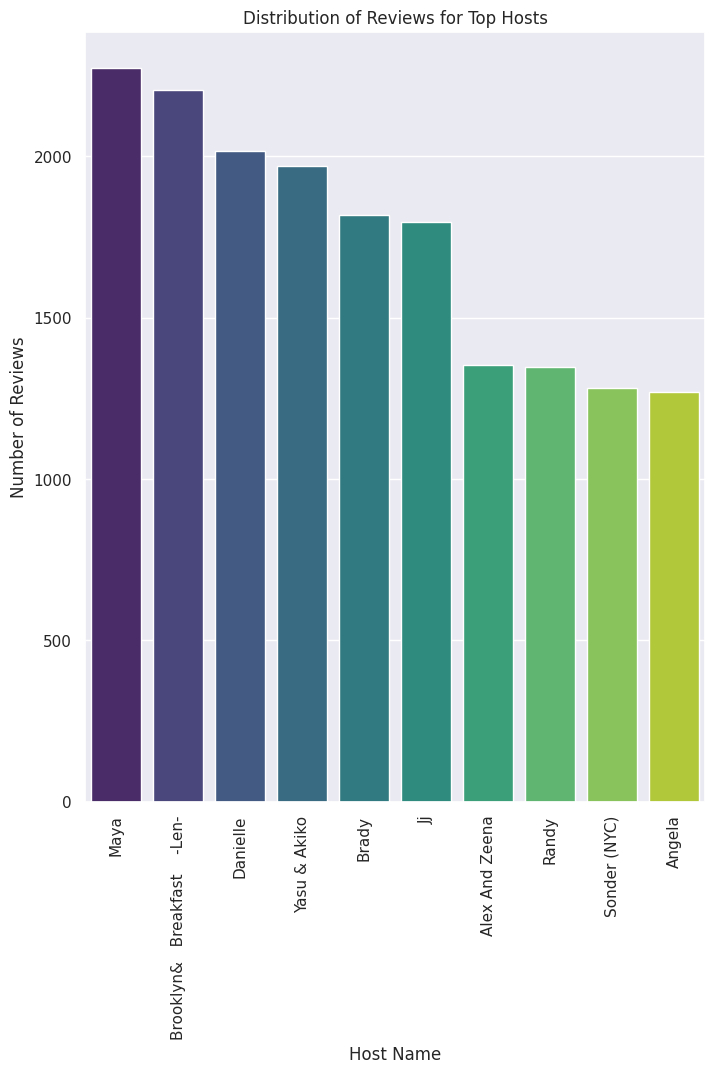

In [ ]:
#plotting the graph with highest reviwes
sns.barplot(x=['host_name'], y='number_of_reviews', data=highest_review, palette='viridis')
plt.xlabel('Host Name')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews for Top Hosts')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

 It helps in identifying hosts with the highest number of reviews, providing insight into the popularity and satisfaction levels of these hosts.

##### 2. What is/are the insight(s) found from the chart?

Indicates the popularity of certain hosts based on the frequency of reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlighting top hosts with positive reviews can be leveraged for marketing and attracting more guests.Positive reviews contribute to the reputation of the hosts and the overall platform.

High review numbers do not necessarily indicate overall quality or guest satisfaction.

#### Chart - 12

Density of property within a neighbourhood group with location

Text(0.5, 1.0, 'Density of property within a neighbourhood group with location')

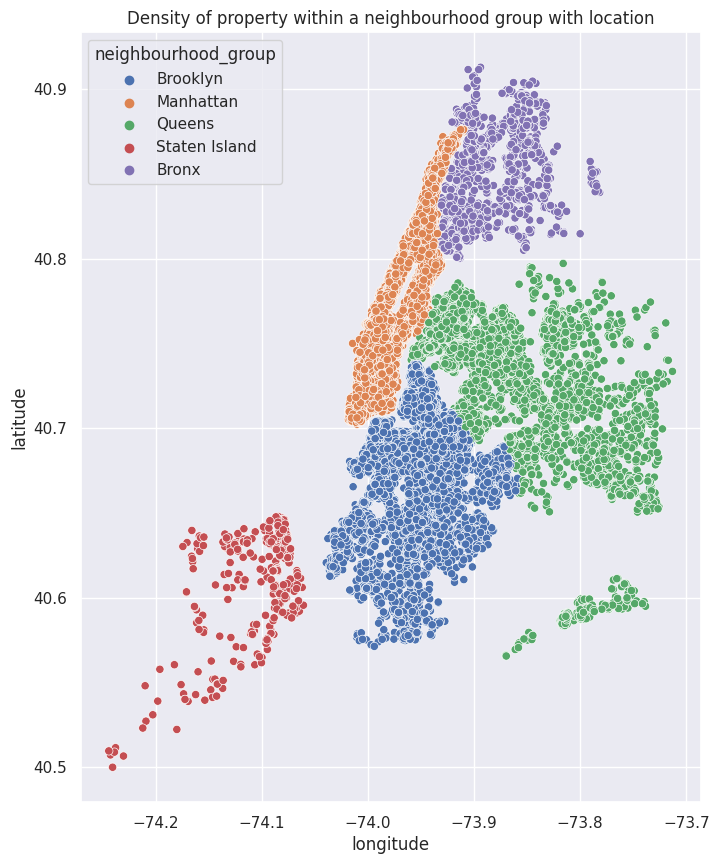

In [ ]:
#scatter plot for location
location=sns.scatterplot(x='longitude',y='latitude',data=airbnb_df,hue='neighbourhood_group')
location.set_title("Density of property within a neighbourhood group with location")


##### 1. Why did you pick the specific chart?

The scatter plot is used to visualize the geographical distribution of properties based on latitude and longitude, with different colors representing different neighborhood groups.

##### 2. What is/are the insight(s) found from the chart?

Indicates density patterns in different areas, highlighting areas with a higher concentration of properties.The most dense area is Brooklyn with respect to longitude and latitude.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps in understanding the spatial distribution of properties across different neighborhoods.Helps users (both hosts and guests) understand the distribution of properties, aiding in decision-making.Can be used for marketing by showcasing the diversity of property locations within different neighborhood groups.

#### Chart - 13

Correlation of different numerical attributes.

<ipython-input-62-f5771e2b492c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(airbnb_df.corr(),annot=True,cmap='coolwarm')


<Axes: >

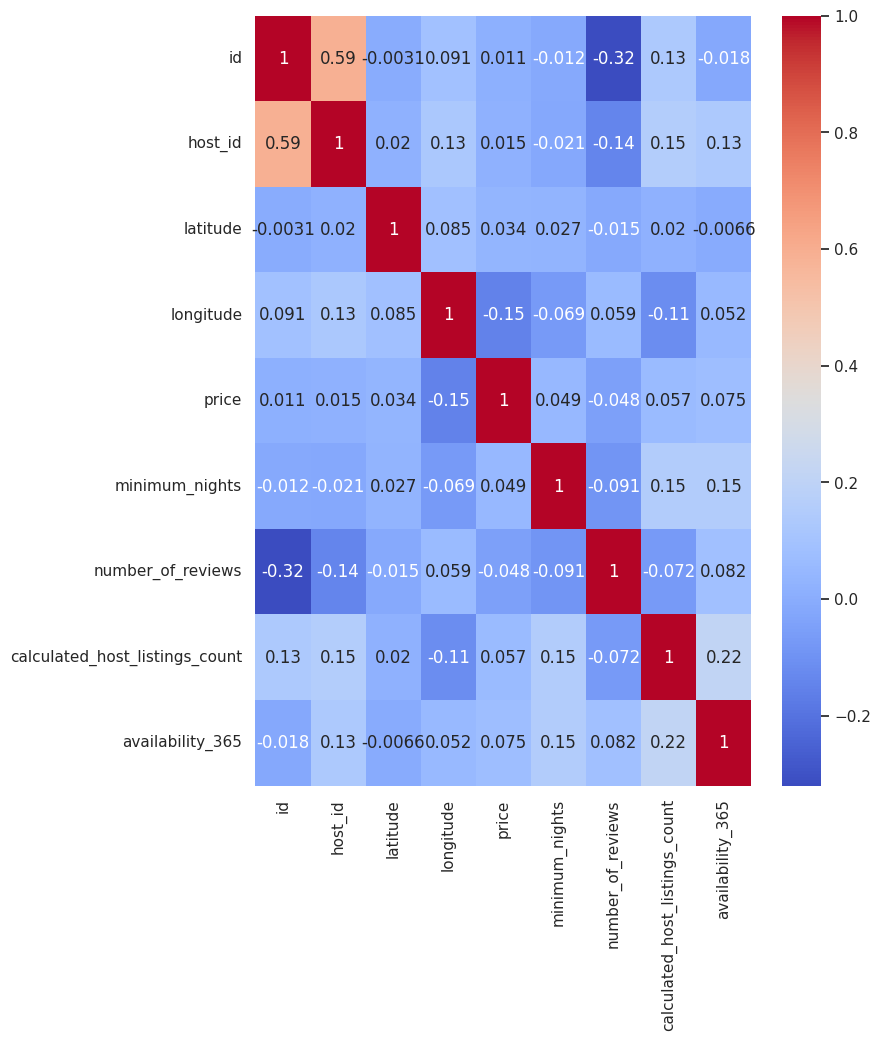

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(airbnb_df.corr(),annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

The correlation heatmap is used to visualize the correlation matrix of a dataset.It helps identify relationships and dependencies between different numerical variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Warmer colors (e.g., shades of red) indicates that as one variable increases, the other tends to increase as well.
Cooler colors (e.g., shades of blue) indicates that as one variable increases, the other tends to decrease.
The diagonal line represents the correlation of a variable with itself and is always 1.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Businesses can optimize resources by understanding which factors influence each other.Insights from the chart can inform decision-making by highlighting variables that strongly correlate, aiding in strategic planning.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

*   Allocate marketing resources more heavily in Manhattan and Brooklyn due to their high host concentration and customer demand.
*   Since 'Entire home/apt' is the most listed and preferred type, consider promoting and expanding this category.
* Explore ways to increase the popularity of 'Shared Room' listings, as they currently constitute a small percentage.
* Implement dynamic pricing strategies for Manhattan, as it has the highest average payment across all room types. This can maximize revenue.
* Recognize the high availability in Staten Island and tailor promotions or incentives to increase bookings.
* Address the lower availability in Brooklyn; this might involve encouraging hosts to list their properties or partnering with them.
* Capitalize on the trend of longer stays in private rooms in Brooklyn and Manhattan. Consider promotions or packages for extended bookings.
* Encourage hosts to use popular keywords like 'bedroom,' 'cozy,' 'private,' etc., in their listings to attract more attention.
*  Provide support and incentives for hosts with a high turnover, especially those in the top three like Sonder(nyc), Blueground, and Sally.
* Leverage the popularity of the top ten hosts with the most reviews in marketing campaigns to build trust and attract more customers.
* Utilize the density information in Brooklyn for targeted advertising or promotions in specific regions.

# **Conclusion**

Through this exploratory data analysis (EDA) and visualization, we gained several interesting insights into the Airbnb rental market. This Airbnb dataset  appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented, like we got to know:
*   Manhattan is the most focused place in New York for hosts to do their business.
* Manhattan and Broklyn has the most number of hosts.

*  Customers pay highest average amount in Manhattan for all the three types of room.

*  'Entire home/apt' room type has the highest number of listing of 52% and ‘Shared Room’ is the least listed room type at only 2.4% in total.
* There is highest avalibility in Staten Island and lowest in Brooklyn in the year.
*  People stay for longer duration of time in Private rooms in Brooklyn and Manhattan.
*  Words such as ‘bedroom’, ‘cozy’, ‘private’, ‘apartment’ and ‘spacious’ are used more frequently than words such as ‘park’, ‘near’, ‘village’ and ‘heart’.

*  Count of listing by top 10 hosts is almost 2.5%(1270 listings) of the whole dataset. Top three host base on their turnover are Sonder(nyc),Blueground, Sally and best host is Sonder(nyc).
*  More customer preferred Manhattan location for night stay then Brooklyn.
* The entire home appartment is highest in average minimum nights and private room is lowest.
* The top ten hosts with the most reviews helps in marketing.
* The most dense area is Brooklyn with respect to longitude and latitude.
* The heatmap can pe used as a corelation function which defines the impact of a attribute on another attribute.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***